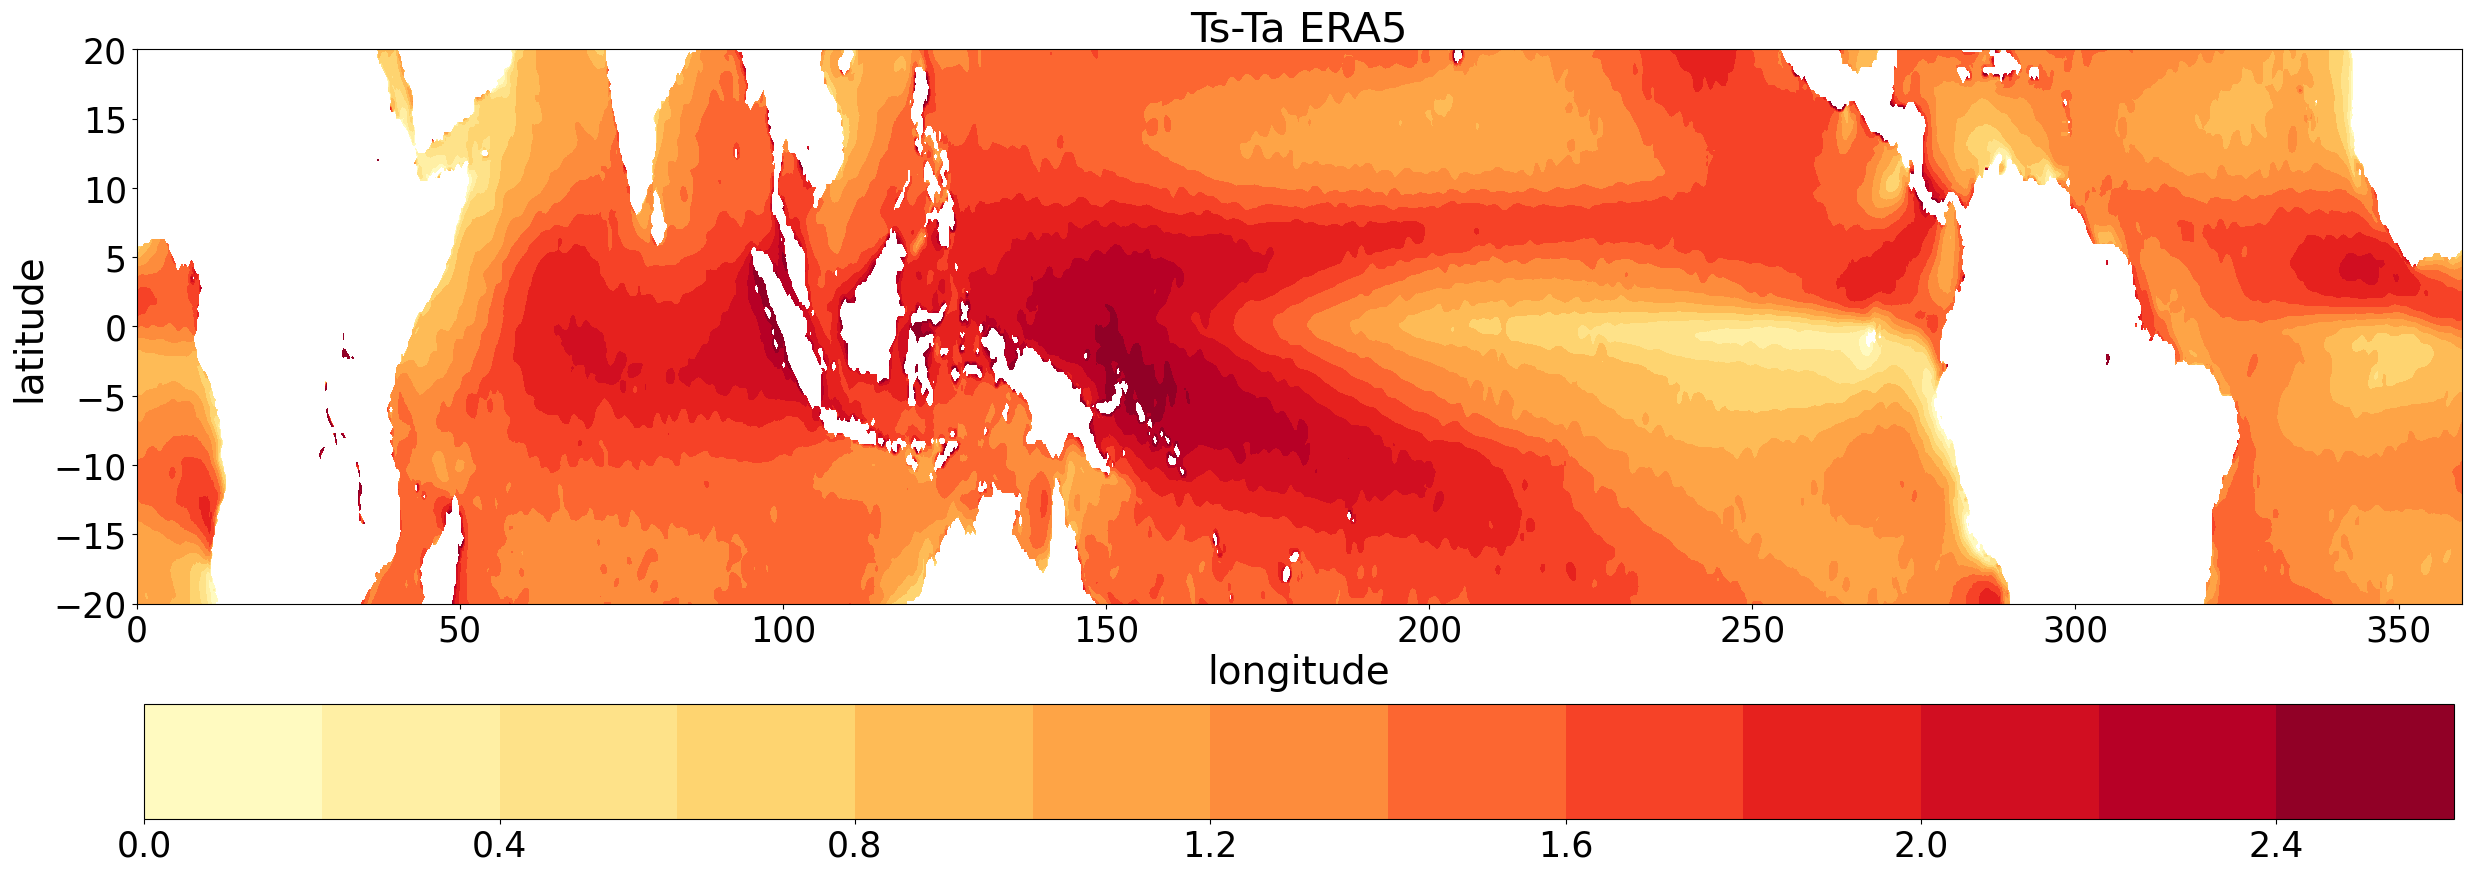

In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar

###############
# plot ERA5
###############
datain = iris.load_cube('/work/bb1153/b381639/ERA5/DT_tropical_ocean.nc')

datain.data=datain.data
datain.data=datain.data*-1
regyonx=datain[0,:,:]

ERA5=regyonx
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data #+ 180             # lonm is y-axis  
#print(arr[0,0,:].data)

  
#arr = np.roll(arr, 720, axis = 2)
##################
#(2)set color bar and prepare fig size
levels1=np.arange(0,2.8,.2)   # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#levels1=np.arange(0.,18.,1.) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='jet'
cbar='YlOrRd'
#cbar='turbo'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,arr,levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('Ts-Ta ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('Ts-Ta_ERA5.eps',format='eps',dpi=1000)

In [2]:
def interpolate_x(cube,save=None):
    import iris
    import iris.coord_categorisation
    target_lon = iris.coords.DimCoord(np.linspace(0,360,720),standard_name='longitude',units='degrees')
    target_lat = iris.coords.DimCoord(np.linspace(-20,20,80),standard_name='latitude',units='degrees',circular=True)
    target_cube = iris.cube.Cube(np.zeros((80,720),np.float32),dim_coords_and_dims=[(target_lat,0),(target_lon,1)])
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    target_cube.coord('longitude').guess_bounds()
    target_cube.coord('latitude').guess_bounds()
    scheme = iris.analysis.AreaWeighted(mdtol=0)
    interp_cube = cube.regrid(target_cube,scheme)

    if save is not None:
        iris.save(interp_cube,save)
    return(interp_cube)

In [3]:
cube_era5=interpolate_x(ERA5)

/sw/spack-levante/mambaforge-4.13.0-1-Linux-x86_64-budobm/lib/python3.9/site-packages/iris/analysis/_area_weighted.py:496: RuntimeWarning: invalid value encountered in divide
  frac_masked = 1 - np.true_divide(unmasked_weights_sum, weights_sum)


In [11]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot ERA5
###############

dataT2 = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Hcam5_1.cam.h1.0010-01-01-00000_timmean.nc','TREFHT')
dataTs = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Hcam5_1.cam.h1.0010-01-01-00000_timmean.nc','SST')
dataDT = dataTs-dataT2

/sw/spack-levante/mambaforge-4.13.0-1-Linux-x86_64-budobm/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'OCNFRAC' invalid units 'fraction'
  warnings.warn(msg)


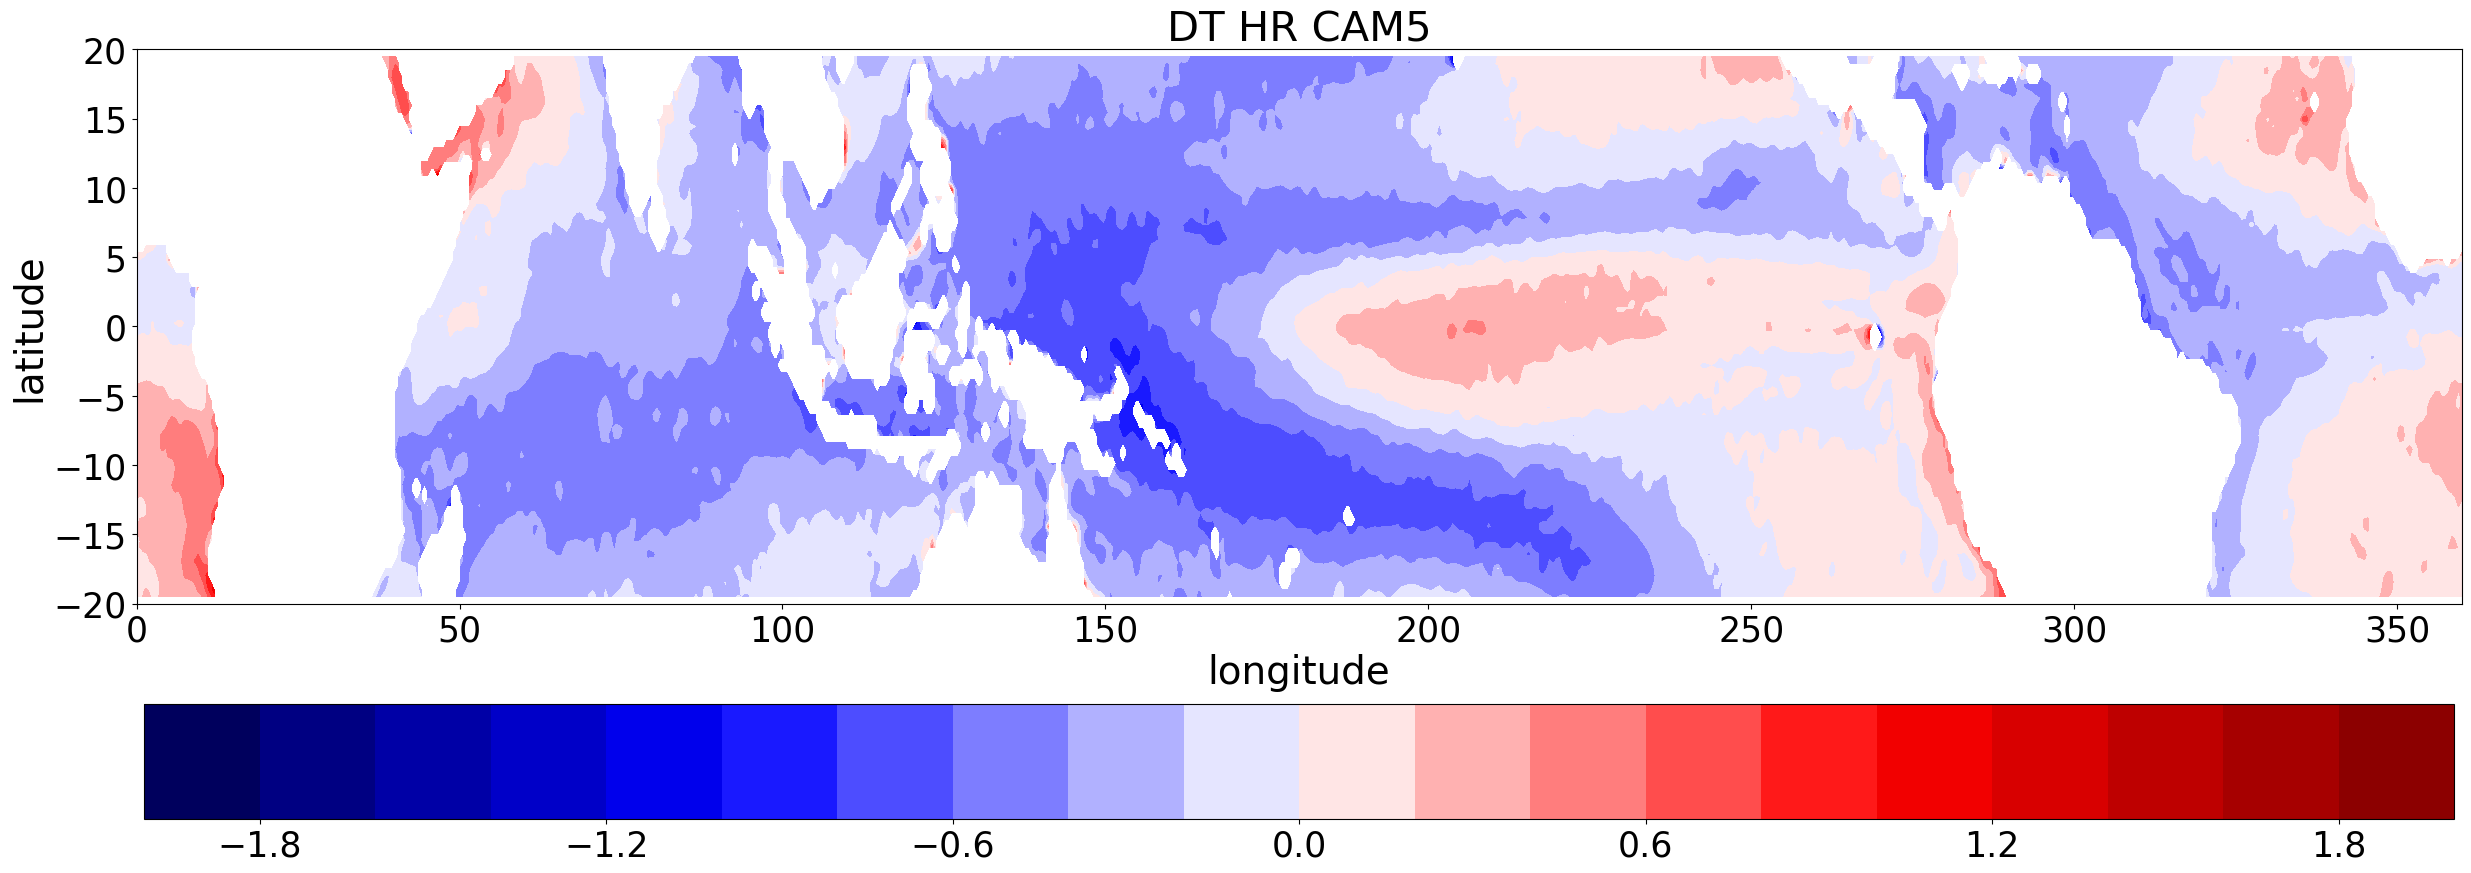

In [17]:
datama = iris.load_cube('/work/bb1153/b381639/NorESM/OCNFRAC.nc','OCNFRAC')
#datain.data=datain.data*-1

cubein=interpolate_x(dataDT[0,:,:])
cubema=interpolate_x(datama[0,:,:])

arr=ar.DataArray.from_iris(cubein) # iris cube to xarray
arrma=ar.DataArray.from_iris(cubema)
arrera5=ar.DataArray.from_iris(cube_era5)

arr_B=arr -arrera5
arr_B.data=arr_B.where(arrma>0)

lon_min = 0
lon_max = 360
lat_min = -20
lat_max = 20

desired_lon = slice(lon_min, lon_max)
desired_lat = slice(lat_min, lat_max)

# make standard dataset selection
arr_sel_ds = arr_B.sel(latitude=desired_lat, longitude=desired_lon)

###################
#(2)set color bar and prepare fig size
levels1=np.arange(-2.,2.2,.2) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-5.,5.,0.5) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='jet'
#cbar='YlOrRd'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(arr_sel_ds.longitude,arr_sel_ds.latitude,arr_sel_ds,levels=levels1,cmap = cbar)
#plt.contourf(arr_sel_ds.longitude,arr_sel_ds.latitude,arr_sel_ds,cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('DT HR CAM5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('DT_HR_CAM5_bias.eps',format='eps',dpi=1000)

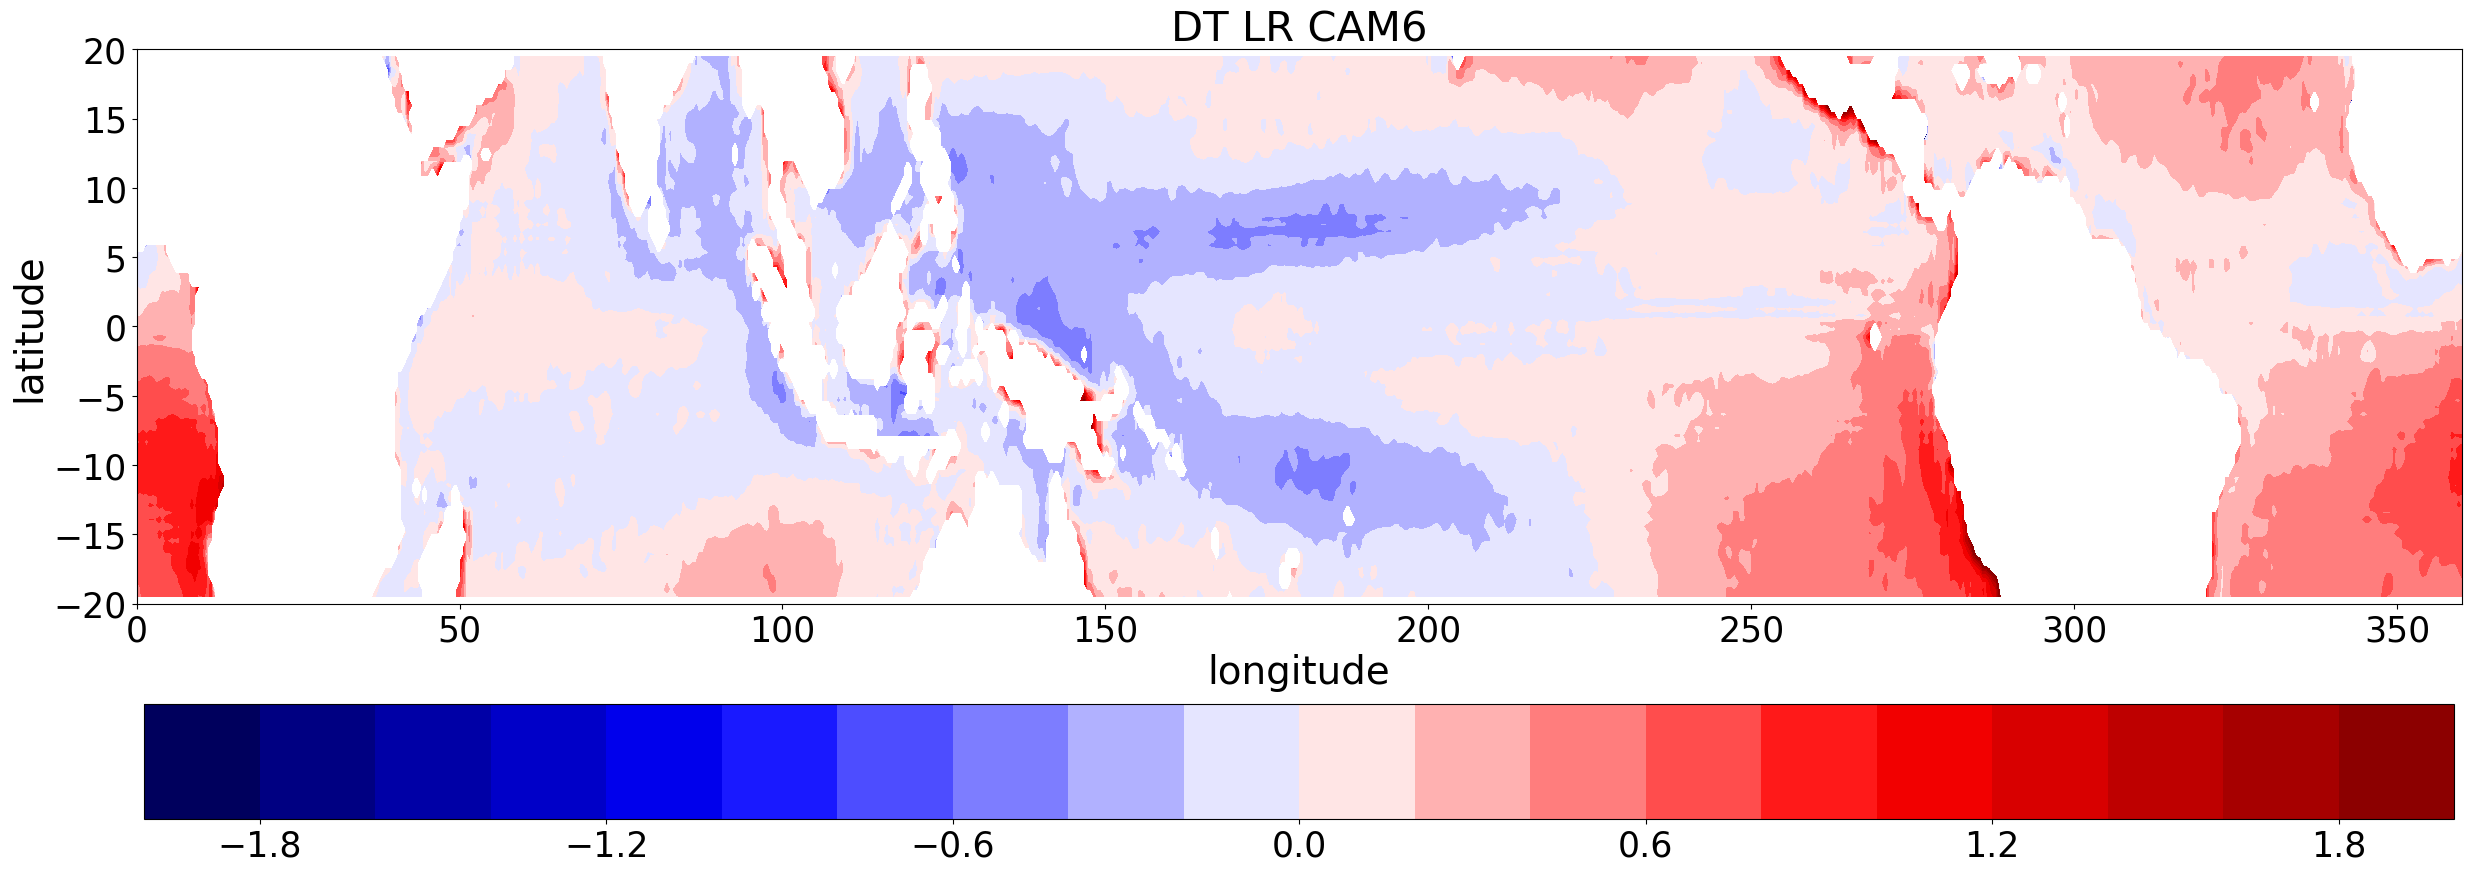

In [19]:
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar

###############
# H resolu CAM
###############
dataT2 = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Lcam6_1.cam.h1.0010-01-01-00000_timmean.nc','TREFHT')
dataTs = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Lcam6_1.cam.h1.0010-01-01-00000_timmean.nc','SST')
dataDT = dataTs-dataT2

datama= iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Lcam6_1.cam.h1.0010-01-01-00000_timmean.nc','SST')

cubein=interpolate_x(dataDT[0,:,:])
cubema=interpolate_x(datama[0,:,:])

arr=ar.DataArray.from_iris(cubein) # iris cube to xarray
arrma=ar.DataArray.from_iris(cubema)
arr_B=arr-arrera5
arr_B.data=arr_B.where(arrma>0)

lon_min = 0
lon_max = 360
lat_min = -20
lat_max = 20

desired_lon = slice(lon_min, lon_max)
desired_lat = slice(lat_min, lat_max)

# make standard dataset selection
arr_sel_ds = arr_B.sel(latitude=desired_lat, longitude=desired_lon)
###################
#(2)set color bar and prepare fig size
levels1=np.arange(-2.,2.2,.2) #(-10,11,1) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-5.,5.,0.5) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='jet'
#cbar='YlOrRd'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(arr_sel_ds.longitude,arr_sel_ds.latitude,arr_sel_ds,levels=levels1,cmap = cbar)
#plt.contourf(arr_sel_ds.longitude,arr_sel_ds.latitude,arr_sel_ds,cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('DT LR CAM6',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('DT_LR_CAM6_bias.eps',format='eps',dpi=1000)

/sw/spack-levante/mambaforge-4.12.0-0-Linux-x86_64-sn2iae/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'hfls'
  warnings.warn(


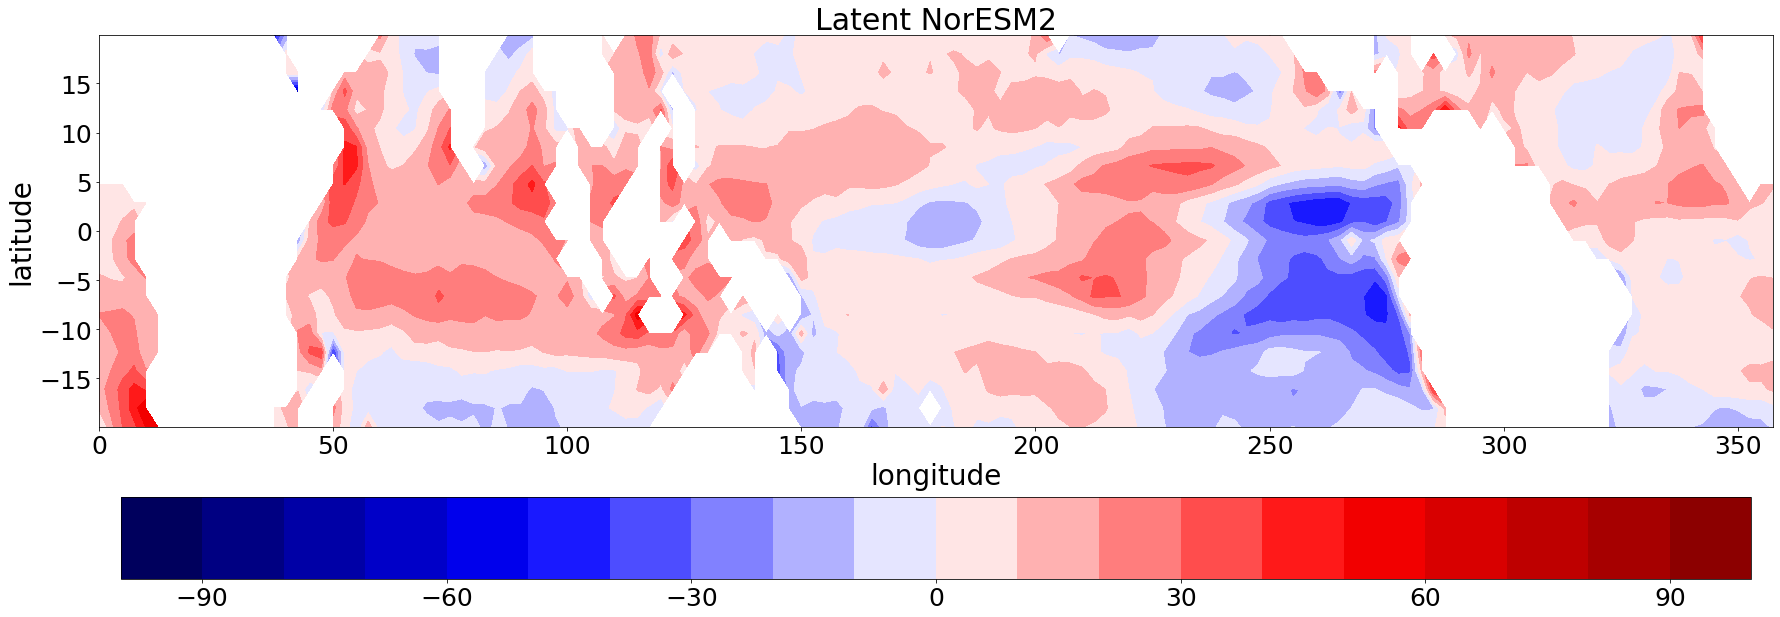

In [23]:


# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot ERA5
###############
datain = iris.load_cube('/work/bb1153/b381639/NorESM2/hfls_day_NorESM2-LM_tropical_bias.nc')

#datain.data=datain.data*86400 

#datain.data=datain.data*-1
regyonx=datain[0,:,:]

ERA5=regyonx

######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
latm=arr.lat.data              # latm is x-axis
lonm=arr.lon.data #-180             # lonm is y-axis  
#arr = np.roll(arr, 360, axis = 2)
##################
#(2)set color bar and prepare fig size
levels1=np.arange(-100,110,10.) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-5.,5.,0.5) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='jet'
#cbar='YlOrRd'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,arr,levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('Latent NorESM2',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('Latent_NorESM2_bias.eps',format='eps',dpi=1000)

/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)


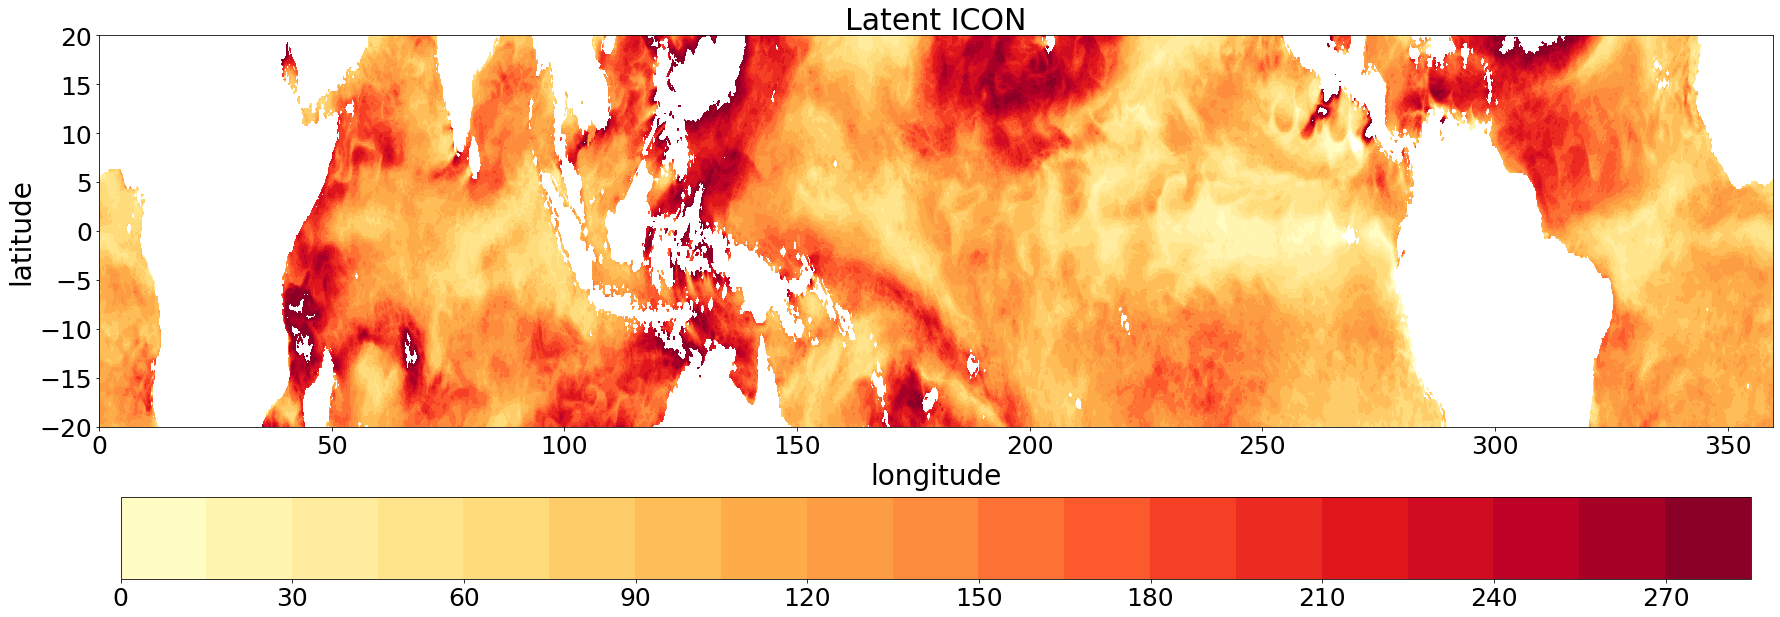

In [36]:
###############
# plot ICON
###############
datain = iris.load_cube('/work/bb1153/b381639/model/data_icon/hfls_tropics_atm_2d_ml_ocean.nc')

datain.data=datain.data

datain.data=datain.data*-1
regyonx=datain[:,:,:]

ERA5=regyonx

######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data +180            # lonm is y-axis  
arr = np.roll(arr, 720, axis = 2)

##################
#(2)set color bar and prepare fig size
levels1=np.arange(0,300,15.) # min and max of the field; dont use it if not sure
#levels1=np.arange(-30,0,1.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
#cbar='seismic'
#cbar='jet'
cbar='YlOrRd'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('Latent ICON',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        

        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('Latent_ICON.eps',format='eps',dpi=1000)